In [1]:
from cmp import *
% matplotlib notebook

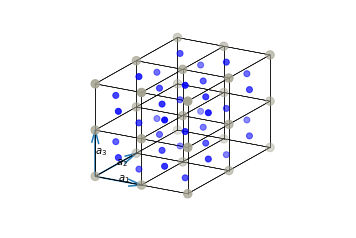

In [2]:
# Inputs

# Lattice vectors (3 vectors of length 3)
a = 1
b = 2
a1 = np.array([1, 0, 0])
a2 = np.array([0, 1, 0])
a3 = np.array([0, 0, 1])
theta = 80*np.pi/180

# Array of basis vectors
basis = np.array([[0,0,0],[0.5,0.5,0],[0.5,0,0.5],[0,0.5,0.5]])
# Colors for each of the basis vectors
colors = ('xkcd:cement','b','b','b')
# Size multiplier for each of the atoms. Default is 1
sizes = (2,1,1,1)


# Gridline type:
# Hard: lines along cartesian axes at integer spacings
# Soft: Lines along cartesian axes. Takes into account nonequal lattice spacing
# LatticeVectors: Lines along the latticevectors (only on lattice points)
GridType = "lattice"

# Limit type:
# Hard: Sets a hard limit on the plotting boundary (default  x = y = z = [0,2])
# Dynamic: Sets the limits as max(nx*a1,ny*a2,nz*a3), so we include nx unitcells in the a1 direction, etc.
# WDynamic: Sets the limits r_min = n_min*[a1 a2 a3] and likewise for n_max
LimType = "wdynamic"
Maxs = [2,2,2]
Mins = [0,0,0]

LatticeCreator(a1,a2,a3,basis,colors,sizes,LimType,GridType,Mins,Maxs)

In [14]:
def LatticeChooser(lattice_name="simple cubic"):
    # Let's just sanitize the input
    lattice_name = lattice_name.lower()
    L = {}
    B = {}
    a, b, c, theta = 1, 1.5, 2, 80 * np.pi / 180
    # Create the relevant lattices (transposed - using row vectors)
    # Simple cubic
    lcubic = np.array([[a, 0, 0], [0, a, 0], [0, 0, a]])
    L["simple cubic"] = lcubic
    # BCC
    lbcc = np.array([[a, 0, 0], [0, a, 0], [a / 2, a / 2, a / 2]])
    L["bcc"] = lbcc
    # FCC
    lfcc = np.array([[a / 2, a / 2, 0], [a / 2, 0, a / 2], [0, a / 2, a / 2]])
    L["fcc"] = lfcc
    # Base Centered Cubic
    lcbase = np.array([[a, 0, 0], [a / 2, a / 2, 0], [0, 0, a]])
    L["base centred cubic"] = lcbase
    # Tetragonal
    ltetra = np.array([[a, 0, 0], [0, a, 0], [0, 0, b]])
    L["tetragonal"] = ltetra
    # Tetragonal Body Centred
    ltbc = np.array([[a, 0, 0], [0, a, 0], [a / 2, a / 2, b / 2]])
    L["tetragonal body centred"] = ltbc
    # Tetragonal Face Centred
    ltfc = np.array([[a / 2, a / 2, 0], [a / 2, 0, b / 2], [0, a / 2, b / 2]])
    L["tetragonal face centred"] = ltfc
    # tetragonal base centred
    ltbase = np.array([[a / 2, a / 2, 0], [0, a, 0], [0, 0, b]])
    L["tetragonal base centred"] = ltbase
    # Orthorhombic
    lortho = np.array([[a, 0, 0], [0, b, 0], [0, 0, c]])
    L["orthorhombic"] = lortho
    # Orthorhombic body centred
    lobc = np.array([[a, 0, 0], [0, b, 0], [a / 2, b / 2, c / 2]])
    L["orthorhombic body centred"] = lobc
    # Orthorhombic Face centred
    lofc = np.array([[a / 2, b / 2, 0], [a / 2, 0, c / 2], [0, b / 2, c / 2]])
    L["orthorhombic face centred"] = lofc
    # Orthorhombic base centred
    lobase = np.array([[a, 0, 0], [a / 2, b / 2, 0], [0, 0, c]])
    L["orthorhombic base centred"] = lobase
    # simple monoclic
    lsmono = np.array([[a, 0, 0], [0, b, 0],
                       [c * np.cos(theta), 0, c * np.sin(theta)]])
    L["simple monoclinic"] = lsmono
    # base centred monoclinic
    lbcmono = np.array([[a, 0, 0], [a / 2, b / 2, 0],
                        [c * np.cos(theta), 0, c * np.sin(theta)]])
    L["base centred monoclinic 3"] = lbcmono
    # Base centred monoclinic (2)
    lbcmono2 = np.array([[a, 0, 0], [a / 2, np.sqrt(3) * a / 2, 0],
                         [c * np.cos(theta), 0, c * np.sin(theta)]])
    L["base centred monoclinic 2"] = lbcmono2
    # Base centred monoclinic (3)
    lbcmono3 = np.array([[a, 0, 0], [a / 2, np.sqrt(3) * a / 2, 0],
                         [a * np.cos(theta), 0, a * np.sin(theta)]])
    L["base centred monoclinic 1"] = lbcmono3
    # Hexagonal 1
    lhexa1 = np.array([[a, 0, 0], [a / 2, np.sqrt(3) * a / 2, 0], [0, 0, a]])
    L["hexagonal 1"] = lhexa1
    # Hexagonal 2
    lhexa2 = np.array([[a, 0, 0], [a / 2, np.sqrt(3) * a / 2, 0], [0, 0, b]])
    L["hexagonal 2"] = lhexa2
    # Triclinc stuff
    gamma = 70 * np.pi / 180
    beta = 60 * np.pi / 180
    cx = c * np.cos(beta)
    cy = c * (np.cos(theta) - np.cos(beta) * np.cos(gamma)) / np.sin(gamma)
    cz = np.sqrt(c**2 - cx**2 - cy**2)
    ltri = np.array([[a, 0, 0], [b * np.cos(gamma), b * np.sin(gamma), 0],
                     [cx, cy, cz]])
    L["triclinic"] = ltri
    # Rhombohedral
    lrhombo = np.array([[a, b, b], [b, a, b], [b, b, a]])
    L["rhombohedral"] = lrhombo

    # conventional fcc
    L["conventional fcc"] = lcubic
    B["conventional fcc"] = a * np.array([[0.5, 0.5, 0],
                                          [0.5, 0, 0.5],
                                          [0, 0.5, 0.5]])

    L["conventional bcc"] = lcubic
    B["conventional bcc"] = a * np.array([0.5, 0.5, 0.5])

    try:
        lattice = L[lattice_name]
    except KeyError:
        print("You did da dumdum, and I now give you simple cubic")
        lattice = L["simple cubic"]

    basisOrigin = np.array([0, 0, 0])

    try:
        basis = B[lattice_name]
    except KeyError:
        basis = np.array([])

    if basis.shape[0] > 0:
        basis = np.vstack((basisOrigin, basis))
    elif basis.shape[0] == 0:
        basis = np.hstack((basisOrigin, basis))
    else:
        print("something went horribly wrong")

    return lattice, basis


In [15]:
LatticeChooser("conventional fcc")

(array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]), array([[0. , 0. , 0. ],
        [0.5, 0.5, 0. ],
        [0.5, 0. , 0.5],
        [0. , 0.5, 0.5]]))